Using log file: logs/cnn_12888647.out


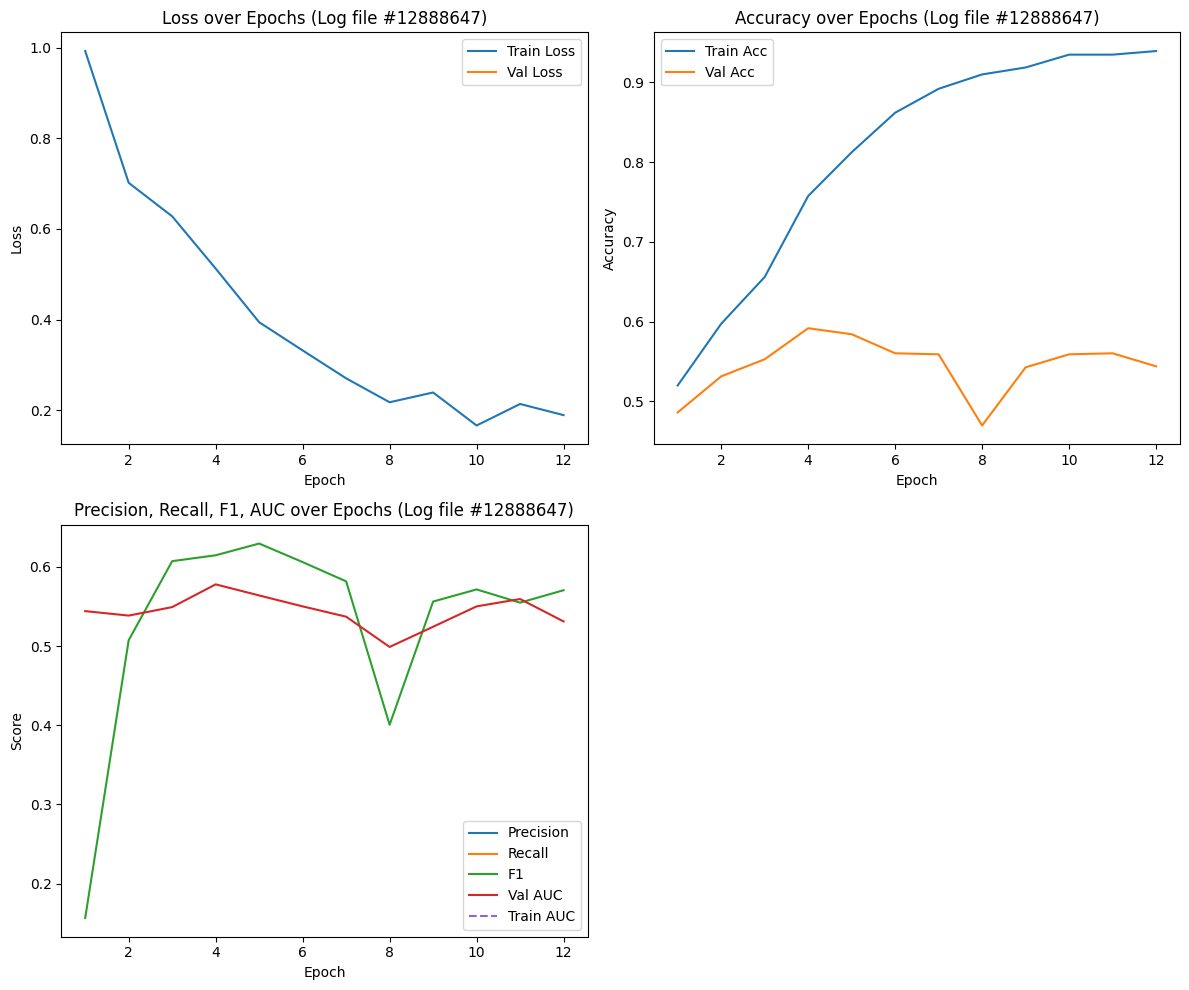

In [ ]:
import re
import matplotlib.pyplot as plt

import os
log_dir = "logs"
log_files = [f for f in os.listdir(log_dir) if f.startswith("cnn_") and f.endswith(".out")]
log_files.sort(key=lambda x: os.path.getmtime(os.path.join(log_dir, x)))
log_file = os.path.join(log_dir, log_files[-1])
print(f"Using log file: {log_file}")

log_file = "logs/cnn_12888580.out"
# Extract log file number for title
log_file_basename = os.path.basename(log_file)
log_file_number_match = re.search(r"cnn_(\d+)\.out", log_file_basename)
log_file_number = log_file_number_match.group(1) if log_file_number_match else "unknown"

epochs = []
train_loss = []
train_acc = []
train_auc = []
val_acc = []
val_loss = []
val_auc = []
precision = []
recall = []
f1 = []

# logs/cnn_12888580.out format:
# Epoch 1: Train Loss: 0.6985 | Train Acc: 0.5039 | Val Acc: 0.4812 | Val F1: 0.5066 | Val AUC: 0.4803

with open(log_file, "r") as f:
    for line in f:
        m = re.match(
            r"Epoch (\d+): Train Loss: ([\d\.]+) \| Train Acc: ([\d\.]+) \| Val Acc: ([\d\.]+) \| Val F1: ([\d\.]+) \| Val AUC: ([\d\.]+)",
            line)
        if m:
            epochs.append(int(m.group(1)))
            train_loss.append(float(m.group(2)))
            train_acc.append(float(m.group(3)))
            val_acc.append(float(m.group(4)))
            f1.append(float(m.group(5)))
            val_auc.append(float(m.group(6)))
            # No explicit val_loss, precision, recall, train_auc in this log format
            continue

# No pre-training metrics in this log format
pretrain_metrics = None

# For plotting, fill missing lists with None to keep array lengths equal
# (val_loss, precision, recall, train_auc)
val_loss = [None] * len(epochs)
precision = [None] * len(epochs)
recall = [None] * len(epochs)
train_auc = [None] * len(epochs)

# --- Insert initial metrics as epoch 0 if available ---
plot_epochs = epochs.copy()
plot_train_loss = train_loss.copy()
plot_val_loss = val_loss.copy()
plot_train_acc = train_acc.copy()
plot_val_acc = val_acc.copy()
plot_train_auc = train_auc.copy()
plot_val_auc = val_auc.copy()
plot_precision = precision.copy()
plot_recall = recall.copy()
plot_f1 = f1.copy()

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Loss plot
axs[0, 0].plot(plot_epochs, plot_train_loss, label="Train Loss")
axs[0, 0].plot(plot_epochs, plot_val_loss, label="Val Loss")
axs[0, 0].set_xlabel("Epoch")
axs[0, 0].set_ylabel("Loss")
axs[0, 0].set_title(f"Loss over Epochs (Log file #{log_file_number})")
axs[0, 0].legend()

# Accuracy plot
axs[0, 1].plot(plot_epochs, plot_train_acc, label="Train Acc")
axs[0, 1].plot(plot_epochs, plot_val_acc, label="Val Acc")
axs[0, 1].set_xlabel("Epoch")
axs[0, 1].set_ylabel("Accuracy")
axs[0, 1].set_title(f"Accuracy over Epochs (Log file #{log_file_number})")
axs[0, 1].legend()

# Precision, Recall, F1, AUC plot
axs[1, 0].plot(plot_epochs, plot_precision, label="Precision")
axs[1, 0].plot(plot_epochs, plot_recall, label="Recall")
axs[1, 0].plot(plot_epochs, plot_f1, label="F1")
axs[1, 0].plot(plot_epochs, plot_val_auc, label="Val AUC")
axs[1, 0].plot(plot_epochs, plot_train_auc, label="Train AUC", linestyle="--")
axs[1, 0].set_xlabel("Epoch")
axs[1, 0].set_ylabel("Score")
axs[1, 0].set_title(f"Precision, Recall, F1, AUC over Epochs (Log file #{log_file_number})")
axs[1, 0].legend()

axs[1, 1].axis('off')  # Empty

plt.tight_layout()
plt.show()
